In [133]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [135]:
X = pd.DataFrame(digits.data, columns=digits.feature_names)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [136]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [138]:
params = {'n_neighbors': range(2, 10)}

In [139]:
model = KNeighborsClassifier()

In [140]:
gs_cv = GridSearchCV(model, params, cv=5)

In [141]:
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10)})

In [142]:
gs_cv.best_params_, gs_cv.best_score_

({'n_neighbors': 3}, 0.9824985771200911)

In [143]:
gs_cv.score(X_train, y_train), gs_cv.score(X_test, y_test)

(0.9928400954653938, 0.9888888888888889)

In [144]:
y_pred = gs_cv.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 64,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 48]], dtype=int64)

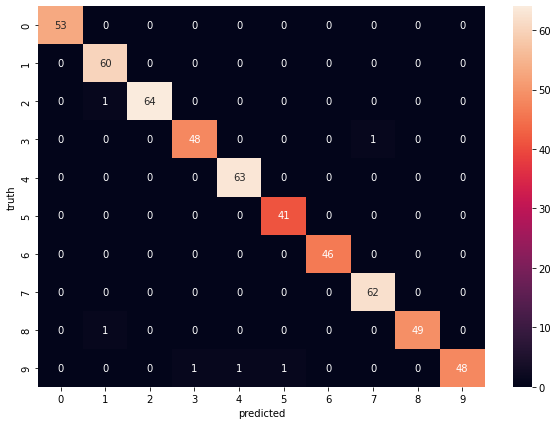

In [145]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth');

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.97      1.00      0.98        60
           2       1.00      0.98      0.99        65
           3       0.98      0.98      0.98        49
           4       0.98      1.00      0.99        63
           5       0.98      1.00      0.99        41
           6       1.00      1.00      1.00        46
           7       0.98      1.00      0.99        62
           8       1.00      0.98      0.99        50
           9       1.00      0.94      0.97        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

